# Ejercicio 1:

A partir de la información provista, prepara una presentación donde muestres un análisis a detalle de las ventas:

* Volumen de ventas y ganancia
* Agrupación por articulo
* Agrupación por tipo de articulo
* Proyección de ventas por día
* Proyección de ventas por mes

Realiza conclusiones a partir de la información para dar sugerencias estrategias

## Librarys

In [119]:
%%capture
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

we will be sure to scan the data to confirm that it is in a format suitable for analysis.

In [121]:
df = pd.read_csv('data.csv', encoding='iso-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [122]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [123]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


1. Missing Values: Description and CustomerID have missing values. We can handle the missing values for Description we will change to "no description" due to the grouping by item type and this can be key. For CustomerID, it is more critical as it affects the ability to track sales by customer. Since a large portion of CustomerID is missing, we might consider removing these records for customer-related analysis, but keeping them for general sales analysis.

2. Outliers and Negative Values in Quantity and UnitPrice: We observed negative values in Quantity and UnitPrice, which may represent returns or corrections to sales. For sales volume and profit analysis, we will need to handle these values appropriately. We might choose to separate sales from returns or simply remove return transactions if we are interested only in net sales.

3. Data type conversion: It is essential to convert InvoiceDate to a date format to facilitate temporal analysis, such as projecting sales by day and by month.

4. Creating new columns: For profit analysis, it will be useful to have a column representing total sales(Quantity * UnitPrice) per transaction. Also, we may need to extract the month and year from InvoiceDate for aggregated analysis by month.

In [124]:
sales_analysis_df = df.drop('CustomerID', axis=1)

sales_analysis_df['Description'] = sales_analysis_df['Description'].fillna('Without description')

sales_analysis_df[sales_analysis_df['Description'] == 'Without description']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,Without description,56,12/1/2010 11:52,0.0,United Kingdom
1970,536545,21134,Without description,1,12/1/2010 14:32,0.0,United Kingdom
1971,536546,22145,Without description,1,12/1/2010 14:33,0.0,United Kingdom
1972,536547,37509,Without description,1,12/1/2010 14:33,0.0,United Kingdom
1987,536549,85226A,Without description,1,12/1/2010 14:34,0.0,United Kingdom
...,...,...,...,...,...,...,...
535322,581199,84581,Without description,-2,12/7/2011 18:26,0.0,United Kingdom
535326,581203,23406,Without description,15,12/7/2011 18:31,0.0,United Kingdom
535332,581209,21620,Without description,6,12/7/2011 18:35,0.0,United Kingdom
536981,581234,72817,Without description,27,12/8/2011 10:33,0.0,United Kingdom


In [125]:
sales_analysis_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [126]:
sales_analysis_df = sales_analysis_df[(sales_analysis_df['Quantity'] > 0) & (sales_analysis_df['UnitPrice'] > 0)]

sales_analysis_df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [127]:
sales_analysis_df['TotalPrice'] = sales_analysis_df['Quantity'] * sales_analysis_df['UnitPrice']
sales_analysis_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [128]:
sales_analysis_df[sales_analysis_df['Description'] == 'Without description']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice


Description cleanup to remove special characters and convert to lowercase

In [129]:
sales_analysis_df['Description'] = sales_analysis_df['Description'].str.lower().str.strip().replace('[^\w\s]', '', regex=True)

In [130]:
sales_analysis_df['InvoiceDate'] = pd.to_datetime(sales_analysis_df['InvoiceDate'])
sales_analysis_df['Day'] = sales_analysis_df['InvoiceDate'].dt.day_of_week
sales_analysis_df['Month'] = sales_analysis_df['InvoiceDate'].dt.month
sales_analysis_df['Year'] = sales_analysis_df['InvoiceDate'].dt.year
sales_analysis_df['Time'] = sales_analysis_df['InvoiceDate'].dt.time

In [131]:
invoice_date_start = sales_analysis_df['InvoiceDate'].min()
invoice_date_end = sales_analysis_df['InvoiceDate'].max()
print(f'Invoice date start: {invoice_date_start}')
print(f'Invoice date end: {invoice_date_end}')

Invoice date start: 2010-12-01 08:26:00
Invoice date end: 2011-12-09 12:50:00


In [132]:
sales_analysis_df = sales_analysis_df.drop('InvoiceDate', axis=1)
sales_analysis_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice,Day,Month,Year,Time
0,536365,85123A,white hanging heart tlight holder,6,2.55,United Kingdom,15.30,2,12,2010,08:26:00
1,536365,71053,white metal lantern,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00
2,536365,84406B,cream cupid hearts coat hanger,8,2.75,United Kingdom,22.00,2,12,2010,08:26:00
3,536365,84029G,knitted union flag hot water bottle,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00
4,536365,84029E,red woolly hottie white heart,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00


# Data Analysis

### Sales volume and profit

Calculate the total sales by multiplying the Quantity by the UnitPrice for each transaction. Then, add these values together to get the total sales volume.

Since we do not have the product cost, we take the sales volume as an approximation of profit.

In [133]:
total_revenue = sales_analysis_df['TotalPrice'].sum()
total_revenue

10666684.544

### Projected daily sales

To project sales, we first group the data by day and month. This will give an idea of sales trends over time.

In [134]:
daily_sales = sales_analysis_df.groupby('Day').agg({'TotalPrice': 'sum'}).reset_index()
daily_sales

,Day,TotalPrice
0,0,1779575.041
1,1,2178632.611
2,2,1851147.810
3,3,2203161.240
4,4,1840340.231
5,6,813827.611


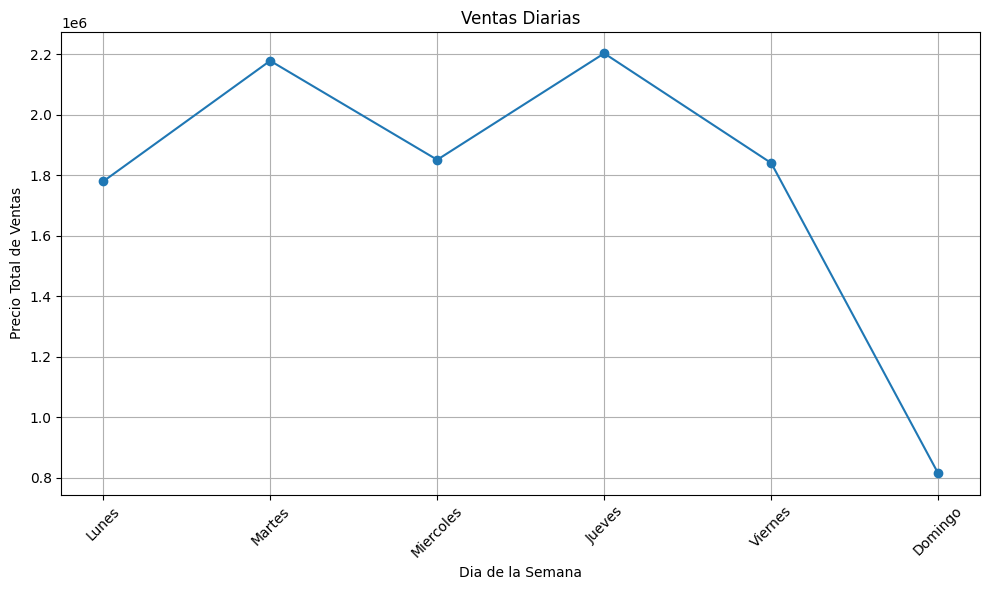

In [135]:
plt.figure(figsize=(10, 6))
# Add to daily_sales['Day'] convcert to "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"
daily_sales['Day'] = daily_sales['Day'].map({0: 'Lunes', 1: 'Martes', 2: 'Miercoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sabado', 6: 'Domingo'})
plt.plot(daily_sales['Day'], daily_sales['TotalPrice'], marker='o', linestyle='-')

plt.xlabel('Dia de la Semana')
plt.ylabel('Precio Total de Ventas')
plt.title('Ventas Diarias')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


The absence of data for Saturday and the significantly lower sales on Sunday highlight the pattern of lower sales during the weekend. This observation suggests that weekends may not be prime days for sales activity, which is consistent with common retail trends where consumer spending tends to decrease during weekends.

Understanding this pattern is crucial for business planning and resource allocation. It may prompt considerations such as adjusting staffing levels, optimizing marketing efforts to target weekdays more heavily, or implementing special promotions to boost weekend sales. Additionally, further investigation into the factors contributing to the low sales on Sundays could uncover opportunities for improvement, whether it be through adjusting product offerings, enhancing customer experience, or refining marketing strategies for weekend shoppers.

Monthly

In [136]:
monthly_sales = sales_analysis_df.groupby('Month').agg({'TotalPrice': 'sum'}).reset_index()
monthly_sales

,Month,TotalPrice
0,1,691364.560
1,2,523631.890
2,3,717639.360
3,4,537808.621
4,5,770536.020
5,6,761739.900
6,7,719221.191
7,8,759138.380
8,9,1058590.172
9,10,1154979.300


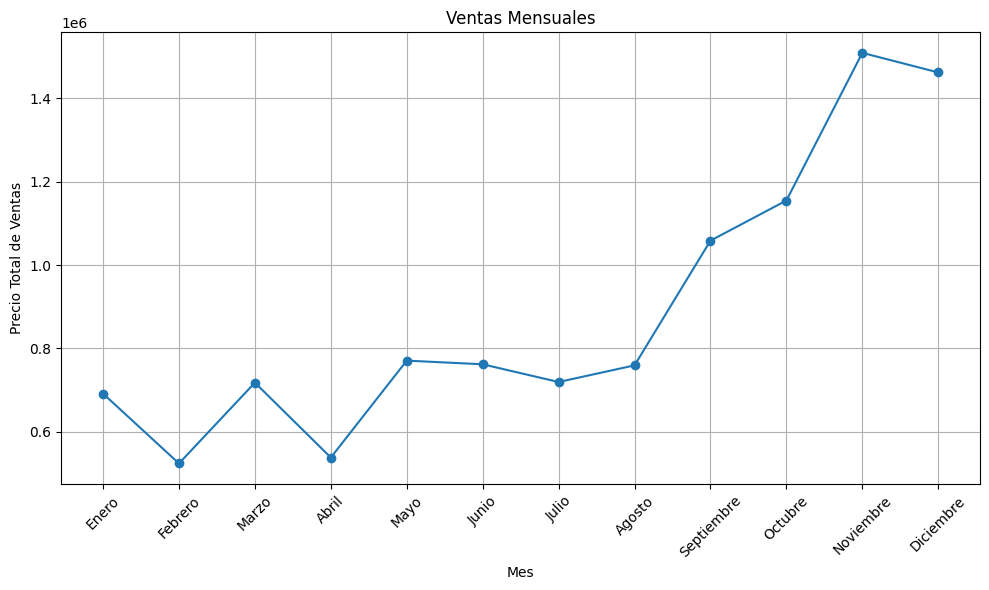

In [137]:
plt.figure(figsize=(10, 6))
# Add to monthly_sales['Month'] convcert to "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
monthly_sales['Month'] = monthly_sales['Month'].map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})
plt.plot(monthly_sales['Month'], monthly_sales['TotalPrice'], marker='o', linestyle='-')

plt.xlabel('Mes')
plt.ylabel('Precio Total de Ventas')
plt.title('Ventas Mensuales')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

Seasonal Sales Pattern: There is a noticeable fluctuation in sales totals throughout the months, with higher sales consistently observed from September to December. This suggests an increase in business activity during the holiday season and year-end festivities, which is a common trend across various industries.

Highlighted Months: November and December stand out as the months with the highest sales totals, followed by October and September. This could be attributed to holiday shopping trends, special promotions such as Black Friday deals, and seasonal demand patterns.

Low Sales Months: February and April appear to have relatively lower sales totals compared to other months, indicating potential periods of reduced business activity or seasonal fluctuations in demand for certain products.

### Grouping by item

In [138]:
num_variations = sales_analysis_df['StockCode'].nunique()
num_variations

3922

In [139]:
num_variations = sales_analysis_df['Description'].nunique()
num_variations

4005

It's observed that the count of unique descriptions doesn't match the count of unique stock numbers,
suggesting the possibility that some stock numbers might be linked to more than one description.

In [140]:
stockcode_description = sales_analysis_df.groupby('StockCode')['Description'].nunique().reset_index()
stockcode_description[stockcode_description['Description'] > 1]

,StockCode,Description
104,17107D,3
123,20622,2
175,20725,2
270,20914,2
412,21175,2
...,...,...
3475,85184C,2
3477,85185B,2
3548,90014A,2
3549,90014B,2


In [141]:
description_stockcode = sales_analysis_df.groupby('Description')['StockCode'].nunique().reset_index()
description_stockcode[description_stockcode['StockCode'] > 1]

,Description,StockCode
32,3 gardenia morris boxed candles,2
47,3 white choc morris boxed candles,2
58,3d dog picture playing cards,2
60,3d sheet of cat stickers,2
61,3d sheet of dog stickers,2
...,...,...
3887,wooden frame antique white,2
3916,woven berries cushion cover,2
3917,woven bubble gum cushion cover,2
3918,woven candy cushion cover,2


In [142]:
stockcode_description = sales_analysis_df.groupby('StockCode')['Description'].max().reset_index()
sales_analysis_df = sales_analysis_df.drop('Description', axis=1)
sales_analysis_df = sales_analysis_df.merge(stockcode_description, on='StockCode')

Stock code graphing

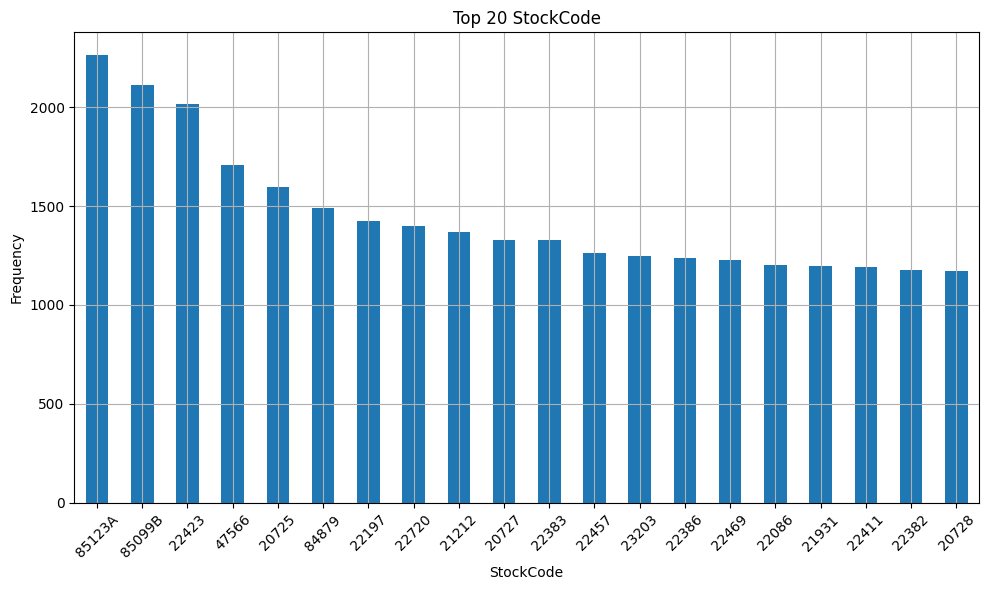

In [143]:
plt.figure(figsize=(10, 6))
sales_analysis_df['StockCode'].value_counts().head(20).plot(kind='bar')

plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Top 20 StockCode')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

Description graph

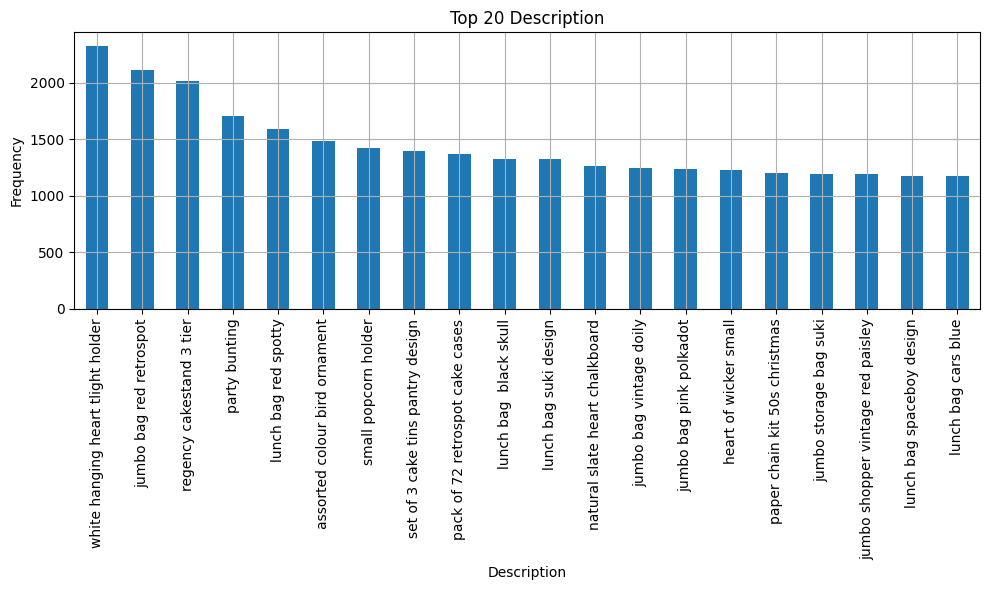

In [144]:
plt.figure(figsize=(10, 6))
sales_analysis_df['Description'].value_counts().head(20).plot(kind='bar')

plt.xlabel('Description')
plt.ylabel('Frequency')
plt.title('Top 20 Description')

plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
stock_freq = sales_analysis_df['StockCode'].value_counts().head(20)
top_stock_codes = top_stock_codes = stock_freq.index.tolist()
top_descriptions = sales_analysis_df.drop_duplicates('StockCode').set_index('StockCode').loc[top_stock_codes]['Description']
top_descriptions

StockCode
85123A    white hanging heart tlight holder
85099B              jumbo bag red retrospot
22423              regency cakestand 3 tier
47566                         party bunting
20725                  lunch bag red spotty
84879         assorted colour bird ornament
22197                  small popcorn holder
22720      set of 3 cake tins pantry design
21212       pack of 72 retrospot cake cases
20727                lunch bag  black skull
22383                 lunch bag suki design
22457        natural slate heart chalkboard
23203               jumbo bag vintage doily
22386               jumbo bag pink polkadot
22469                 heart of wicker small
22086         paper chain kit 50s christmas
21931                jumbo storage bag suki
22411     jumbo shopper vintage red paisley
22382             lunch bag spaceboy design
20728                   lunch bag cars blue
Name: Description, dtype: object

### Gruoping by item and item type

#### total revenues and sales by item 

In [146]:
stock_code_sales = sales_analysis_df.groupby('StockCode').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
stock_code_sales

,StockCode,TotalPrice,Quantity
0,10002,759.89,860
1,10080,119.09,303
2,10120,40.53,193
3,10123C,3.25,5
4,10124A,6.72,16
...,...,...,...
3917,gift_0001_20,167.05,10
3918,gift_0001_30,175.53,7
3919,gift_0001_40,100.70,3
3920,gift_0001_50,167.56,4


#### grouppin by item type

In [147]:
# Create dict with StockCode as key and Description as value
types_keywords = {
    'Bags': ['bag', 'bag jumbo', 'lunch bag', 'storage bag', 'bag shopper'],
    'Decorations': ['heart', 'lantern', 'bunting', 'holder'],
    'Kitchen utensils': ['cakestand', 'cake cases', 'popcorn holder', 'cake tins'],
    'Party': ['party'],
    'Storage': ['storage', 'box'],
    'Christmas Decoration': ['christmas']
}

# Function for assign type to description
def assign_type(description):
    for type_, keywords in types_keywords.items():
        if any(keyword in description.lower() for keyword in keywords):
            return type_
    return 'Other'

# Add new column 'Type' with the type of the description
sales_analysis_df['Type'] = sales_analysis_df['Description'].apply(assign_type)

sales_analysis_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,TotalPrice,Day,Month,Year,Time,Description,Type
0,536365,85123A,6,2.55,United Kingdom,15.30,2,12,2010,08:26:00,white hanging heart tlight holder,Decorations
1,536365,71053,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00,white moroccan metal lantern,Decorations
2,536365,84406B,8,2.75,United Kingdom,22.00,2,12,2010,08:26:00,cream cupid hearts coat hanger,Decorations
3,536365,84029G,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00,knitted union flag hot water bottle,Other
4,536365,84029E,6,3.39,United Kingdom,20.34,2,12,2010,08:26:00,red woolly hottie white heart,Decorations


In [148]:
sales_analysis_df['Type'].unique()

array(['Decorations', 'Other', 'Storage', 'Bags', 'Christmas Decoration',
       'Kitchen utensils', 'Party'], dtype=object)

In [149]:
type_sales = sales_analysis_df.groupby('Type').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
type_sales

,Type,TotalPrice,Quantity
0,Bags,1115516.880,610719
1,Christmas Decoration,360667.090,244881
2,Decorations,1440212.720,738186
3,Kitchen utensils,355350.740,202851
4,Other,6697649.374,3407271
5,Party,46193.990,50385
6,Storage,651093.750,334083


C:\Users\israel\AppData\Local\Temp\ipykernel_6836\3930737428.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TotalPrice', y='Type', data=sales_analysis_df, ci=None, palette='muted')
C:\Users\israel\AppData\Local\Temp\ipykernel_6836\3930737428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Type', data=sales_analysis_df, ci=None, palette='muted')


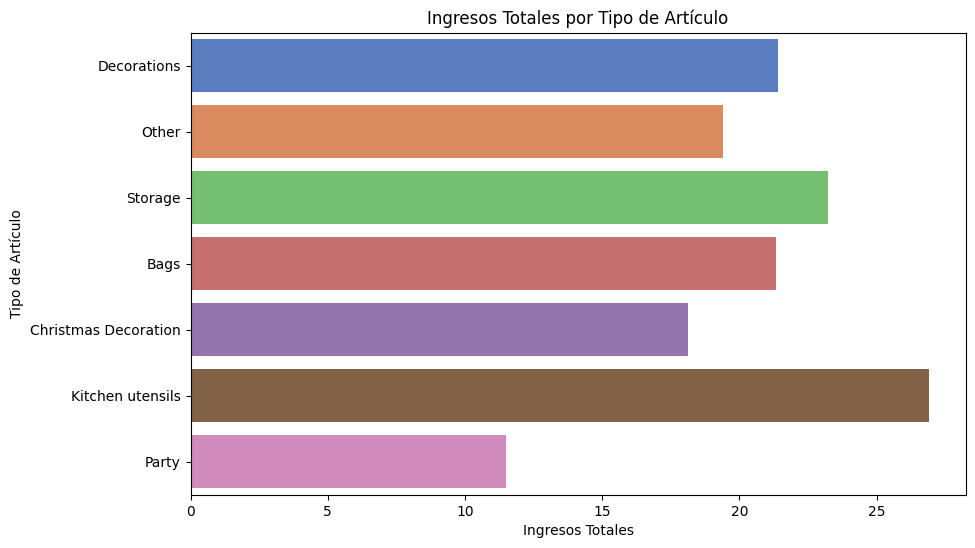

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Type', data=sales_analysis_df, ci=None, palette='muted')
plt.title('Ingresos Totales por Tipo de Artículo')
plt.xlabel('Ingresos Totales')
plt.ylabel('Tipo de Artículo')
plt.show()

### Optional groupping for country

In [151]:
country_sales = sales_analysis_df.groupby('Country').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
country_sales.head()

,Country,TotalPrice,Quantity
0,Australia,138521.31,83901
1,Austria,10198.68,4881
2,Bahrain,754.14,314
3,Belgium,41196.34,23237
4,Brazil,1143.60,356


In [152]:
details_country_items = sales_analysis_df.groupby(['Country', 'Type']).agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
details_country_items.head()

,Country,Type,TotalPrice,Quantity
0,Australia,Bags,9203.15,5803
1,Australia,Christmas Decoration,6199.34,2863
2,Australia,Decorations,6797.89,2999
3,Australia,Kitchen utensils,7581.50,3194
4,Australia,Other,92597.53,58793


In [153]:
details_country = sales_analysis_df.groupby('Country').agg({'TotalPrice': 'sum'}).reset_index()
details_country.head()

,Country,TotalPrice
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,754.14
3,Belgium,41196.34
4,Brazil,1143.60


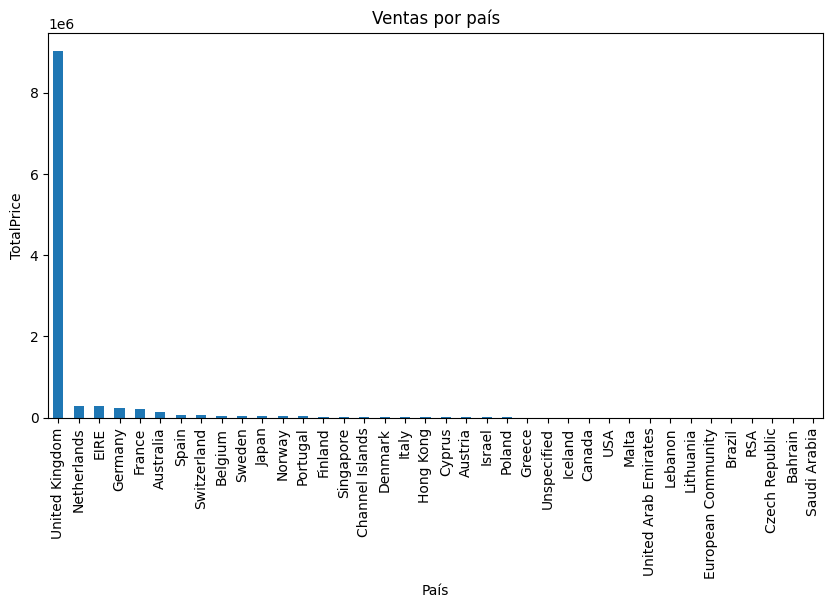

In [154]:
sales_by_country = sales_analysis_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_country.plot(kind='bar')
plt.title('Ventas por país')
plt.xlabel('País')
plt.ylabel('TotalPrice')
plt.show()

## Interpretaciones

1. <strong>Días de Mayor y Menor Venta:</strong> Los martes y jueves son los días con mayores ventas. Esto podría indicar patrones de comportamiento de los consumidores para comprar en estos dias en especifico, lo que sugiere que estos días son los más fuertes para las ventas. Por otro lado, la ausencia de datos para el sábado y las ventas significativamente más bajas el domingo resaltan el patrón de menores ventas durante el fin de semana. Esta observación sugiere que los fines de semana pueden no ser días óptimos para la actividad de ventas, lo que es consistente con las tendencias comunes de ventas minoristas donde el gasto del consumidor tiende a disminuir durante los fines de semana.

2. <strong> Ventas por Mes: </strong> Noviembre y diciembre muestran un significativo aumento en las ventas, lo cual es esperable dado el impacto de las festividades de fin de año en el comportamiento de compra. En donde se destaca mucho la venta de articulos para fiestas y principalmente la venta de articulos para navidad.

3. <strong>Tipos de Artículos Más Vendidos:</strong> Los "Bolsos" y "Decoraciones" son categorías con ventas destacadas, lo que señala áreas de productos fuertes. La categoría "Otros" tiene una cantidad significativa de ventas y unidades vendidas, lo que puede sugerir una amplia variedad de productos o una necesidad de categorizar mejor estos artículos para análisis más detallados. Por lo que podemos destacar que los bolsos y decoraciones son los productos más vendidos y que se debería de enfocar en estos productos para aumentar las ventas.

4. <strong>Ventas por País:</strong> El Reino Unido domina en ventas y cantidad, lo que indica que es el mercado principal. Otros países como Australia, Países Bajos y EIRE también representan una parte importante de las ventas, lo que sugiere que estos mercados internacionales son significativos para tu negocio.
Mientras que el Reino Unido es el mercado principal, la diversificación de las ventas en otros países puede ser una estrategia valiosa para expandir la presencia global y reducir la dependencia de un solo mercado.


Los datos indican áreas clave de enfoque y oportunidades para el negocio. La implementación de estrategias basadas en estos insights puede ayudar a maximizar las ventas, optimizar la gestión de inventario y expandir la presencia en mercados internacionales. Además, la aplicación de análisis estadístico y modelado predictivo proporcionará una base más sólida para la toma de decisiones estratégicas.